In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

seeds = 16
random.seed(seeds)
np.random.seed(seeds)
tf.random.set_seed(seeds)

## Load Datasets

In [28]:
df_diabetes = pd.read_csv('./pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


/tmp/ipython-input-4210084904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_diabetes['age'])


<Axes: xlabel='age', ylabel='Density'>

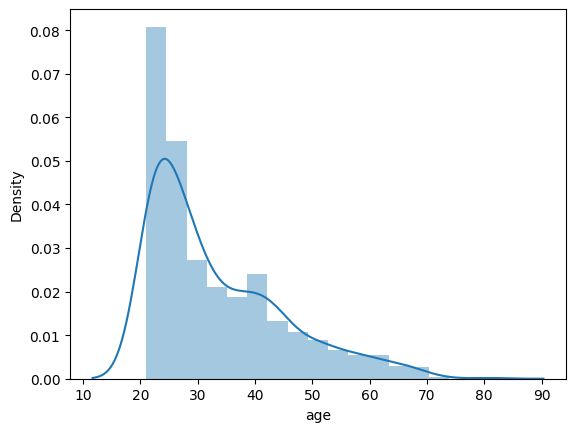

In [30]:
sns.distplot(df_diabetes['age'])

In [31]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Split Datasets

In [32]:
features = df_diabetes.values[:,:8]

In [33]:
labels = df_diabetes.values[:,8:]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=seeds)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Define Model

In [35]:
# define the keras sequential model
model = Sequential()

In [36]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [38]:
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train Model

In [39]:
early_stopper = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs=250, batch_size=8, validation_split=0.2, callbacks=[early_stopper])

Epoch 1/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3733 - loss: 0.8570 - val_accuracy: 0.3171 - val_loss: 0.7753
Epoch 2/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3805 - loss: 0.7851 - val_accuracy: 0.4065 - val_loss: 0.7298
Epoch 3/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4342 - loss: 0.7525 - val_accuracy: 0.5122 - val_loss: 0.7053
Epoch 4/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5234 - loss: 0.7184 - val_accuracy: 0.6341 - val_loss: 0.6908
Epoch 5/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5118 - loss: 0.7077 - val_accuracy: 0.6260 - val_loss: 0.6810
Epoch 6/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6024 - loss: 0.6932 - val_accuracy: 0.6829 - val_loss: 0.6752
Epoch 7/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6050 - loss: 0.6863 - val_accuracy: 0.7317 - val_loss: 0.6710
Epoch 8/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6417 - loss: 0.6764 - val_accuracy: 0.6992 - v

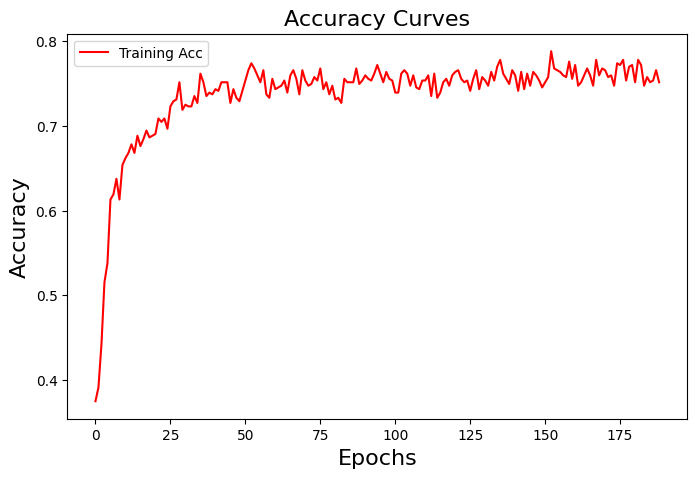

In [40]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

## Evaluate Model

In [41]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test_scaled, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 82.47


# EXTRA STUFF

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# nice result
seeds = 16

def train(seeds):
    random.seed(seeds)
    np.random.seed(seeds)
    tf.random.set_seed(seeds)

    df_diabetes = pd.read_csv('./pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
    df_diabetes.head()

    features = df_diabetes.values[:,:8]
    labels = df_diabetes.values[:,8:]
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=seeds)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
    model.add(Dropout(0.2)) # Tambahkan dropout rate 20%
    model.add(Dense(8, activation='relu')) # 2nd hidden layer
    model.add(Dropout(0.2)) # Tambahkan dropout rate 20%
    model.add(Dense(6, activation='relu')) # 3rd hidden layer
    model.add(Dense(1, activation='sigmoid')) # output layer

    optimizer = Adam(learning_rate=0.0005)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # model.fit(X_train, y_train, epochs=250, batch_size=8, shuffle=False)
    early_stopper = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    model.fit(X_train_scaled, y_train, epochs=250, batch_size=8, validation_split=0.2, callbacks=[early_stopper])

    # evaluate the keras model
    _, accuracy = model.evaluate(X_test_scaled, y_test, verbose=False)
    calc = accuracy*100
    print(f'Accuracy: {calc:.2f}')
    return calc

# res = []
# for i in range(0, 25):
#     seeds = i
#     t = train(seeds)
#     res.append((i, t))
print(train(seeds))


Epoch 1/250


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3733 - loss: 0.8570 - val_accuracy: 0.3171 - val_loss: 0.7753
Epoch 2/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3805 - loss: 0.7851 - val_accuracy: 0.4065 - val_loss: 0.7298
Epoch 3/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4342 - loss: 0.7525 - val_accuracy: 0.5122 - val_loss: 0.7053
Epoch 4/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5234 - loss: 0.7184 - val_accuracy: 0.6341 - val_loss: 0.6908
Epoch 5/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5118 - loss: 0.7077 - val_accuracy: 0.6260 - val_loss: 0.6810
Epoch 6/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6024 - loss: 0.6932 - val_accuracy: 0.6829 - val_loss: 0.6752
Epoch 7/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6050 - loss: 0.6863 - val_accuracy: 0.7317 - val_loss: 0.6710
Epoch 8/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6417 - loss: 0.6764 - val_accuracy: 0.6992 - val_loss: 0.6

---